In [1]:
# Repo link : https://github.com/ShubhInfotech-Bhilai/Probability-and-Statistics-in-Data-Science-Using-Python/blob/master/06-Random%20variable%20and%20variance/Variance.ipynb


%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
#### We start with positive weights that don't sum to 1

P=np.array([[2.,2,4],[1,1,2]])
P2=copy(P)
P

array([[2., 2., 4.],
       [1., 1., 2.]])

In [4]:
# We then normalize the weights
# using Pure Python

#Compute the sum
s=0
for i in range(shape(P)[0]):
    for j in range(shape(P)[1]):
        s+=P[i,j]
print('the sum is ',s)
#divide by the sum
for i in range(shape(P)[0]):
    for j in range(shape(P)[1]):
        P[i,j] /= s
P

the sum is  12.0


array([[0.16666667, 0.16666667, 0.33333333],
       [0.08333333, 0.08333333, 0.16666667]])

In [8]:
##Check whether  and  are independent
##If they are independent then the outer product and P should be equal.

# The pure python way
Px=[0.]*shape(P)[1]
Py=[0.]*shape(P)[0]

for i in range(len(Px)):
    for j in range(len(Py)):
        Px[i]+=P[j,i]
        Py[j]+=P[j,i]

for i in range(len(Px)):
    for j in range(len(Py)):
        if Px[i]*Py[j] != P[j,i]:
            print("Px[%d]*Py[%d] != P[%d,%d] ::::: %5.3f*%5.3f = %5.3f != %5.3f"%(i,j,j,i,Px[i],Py[j],Px[i]*Py[j],P[j,i]))
        else:
            print("Hi") # both the arrays are same

Hi
Hi
Hi
Hi
Hi
Hi


In [14]:
#Python function for sqaure root

P=[8,9,8,9,9,2,3,7]



def sq_list(ListX):
    return (np.array(P)**2)

In [15]:
sq_list(P)

array([64, 81, 64, 81, 81,  4,  9, 49], dtype=int32)

In [16]:
##Calculating the mean and standard deviation



from math import sqrt
#The python way
Ex = 0
for i in range(3):
    Ex+=Px[i]*x[i]
Ey = 0
for i in range(2):
    Ey+=Py[i]*y[i]

varx = 0
for i in range(3):
    varx+=Px[i]*(x[i] - Ex)**2
stdx = sqrt(varx)

vary = 0
for i in range(2):
    vary+=Py[i]*(y[i] - Ey)**2
stdy = sqrt(vary)

Ex,Ey,stdx,stdy

NameError: name 'x' is not defined

In [18]:
#Assigment 1 - Calculate variance standard deviation using Python function

def var_sd(listX):
    import numpy as np
    from math import sqrt
    listX = np.array(listX)
    m = listX.mean()
    n = len(listX)
    num = np.repeat(0,len(listX))
    for i in range(0,n):
        num[i] = (listX[i]-m)**2
    var = sum(num)/n
    sd = sqrt(var)
    return(var,sd)

num_list = [1,2,3,4,5,6]
v,s = var_sd(num_list)
print(v)
   
print(s)
   

2.6666666666666665
1.632993161855452


In [22]:
#Assignment 2 - Calculate the skewness

def average(listX):
    get_sum = sum(listX)
    n = len(listX)
    average= get_sum/n
    return(average)

def mode(listX):
    from scipy.stats import mode
    md = mode(listX)
    return(md[0])

def std_dev(listX):
    import numpy as np
    from math import sqrt
    listX = np.array(listX)
    m = listX.mean()
    n = len(listX)
    num = np.repeat(0,len(listX))
    for i in range(0,n):
        num[i] = (listX[i]-m)**2
    var = sum(num)/n
    sd = sqrt(var)
    return(sd)

def skewness(pop):
    avg = average(pop)
    md = mode(pop)
    sd = std_dev(pop)
    skewness = (avg-md)/sd
    return(int(skewness))
    
    population = np.random.normal(loc=0,scale=1,size=1000)
    print(skewness(population))

C:\Users\amanbansal2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


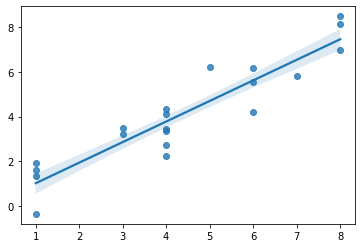

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
x=np.random.randint(1,10,20)
y=x+np.random.normal(0,1,20)

x,y
ax=sns.regplot(x,y,ci=80)

In [33]:
## Assigment 3 
##### Paired sample T-test for the following data

Before_Course = [44,40,61,52,32,44,70,41,67,72,53,72]
After_Course = [53,38,69,57,46,39,73,74,60,78]

import pandas as pd
import math
Data = pd.DataFrame((zip(Before_Course, After_Course)), columns =['Before','After'])
Diff=Data['Before']-Data['After']
import statistics

Mean = statistics.mean(Diff)
Stdev=statistics.stdev(Diff, xbar= Mean)
n=Data.shape[0]
t_statistic=Mean/(Stdev/math.sqrt(n))
dof=n-1
import scipy.stats

p=scipy.stats.t.sf(abs(t_statistic),df=dof)*2
print('t_statistic=', t_statistic, 'p_value=', p)

###############Result conclusion###################
## Since p-value is less than our significance level a=0.05, we reject the null hypothesis

t_statistic= -1.7762555771580684 p_value= 0.10942114812489537


In [34]:
#### chi2 testing ############ Assignment 4
## 2 datasets, first is to select the null hypothesis and second is to reject the null hypothesis

from scipy.stats import chi2_contingency



What does chi2 tell you?


In [36]:
data =[[207,282,241],
      [234,242,232]]

stat, p, dof1, expt = chi2_contingency(data)

print (stat, "   ", p, "   ", dof1, "    ", expt)

4.542228269825232     0.1031971404730939     2      [[223.87343533 266.00834492 240.11821975]
 [217.12656467 257.99165508 232.88178025]]


![](https://i.ytimg.com/vi/misMgRRV3jQ/hqdefault.jpg)

In [38]:
x=.6
output = lambda x : f"{x} is pass the test" if x>.5 else f"{x} is fail the test"

output(.9)
output(.5)
output(.4)


'0.4 is fail the test'

In [40]:
## Point Estimation 

from random import choice
import matplotlib.pyplot as plt
import numpy as np

expected_value = lambda values : sum(values)/len(values)
standard_deviation = lambda values, expected_value: np.sqrt(sum([(v - expected_value)**2 for v in values])/len(values))



In [42]:
mu, sigma = 40,1
population = np.random.normal(mu, sigma, 100000)
mean=expected_value(population)
print( '''overall population:
             expected value : {0}
             standard deviation : {1}'''
     .format (mean,standard_deviation(population,mean)))

overall population:
             expected value : 40.000220057557904
             standard deviation : 0.9976000876617697


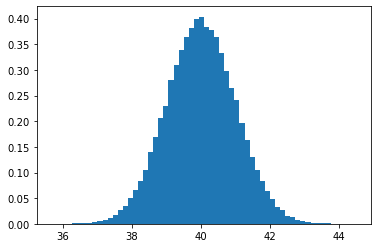

In [43]:
plt.hist(population, 60, density=True)
plt.show()

randomly selected items:
            expected value: 40.057913485230294
            standard deviation: 0.9145174020537683
    


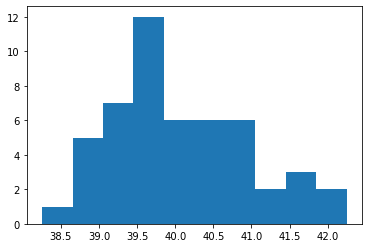

In [45]:
from random import choice
randomly_selected_items = [choice(population) for _ in range(50)]

mean = expected_value(randomly_selected_items)
s_d=standard_deviation(randomly_selected_items, mean)

print(
    '''randomly selected items:
            expected value: {0}
            standard deviation: {1}
    '''.format(mean, standard_deviation(randomly_selected_items, mean)))
plt.hist(randomly_selected_items, 10, density=False)
plt.show()

In [ ]:
########## Reference material used for assignments - 
###  https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/terminology

### Assigment related to Example S.3.2.1 from above reference